In [1]:
import sys
import os

# Визначаємо шлях до каталогу project (двома рівнями вище)
module_path = os.path.abspath(os.path.join(os.getcwd(), '..', 'code'))
if module_path not in sys.path:
    sys.path.append(module_path)

import data_exploration as exploration
import data_cleaning as cleaning

# Data Understanding

In [2]:
import pandas as pd

multiple_apps = [
    'Flutter_UI-Metrics_TimeSeries_MultipleApps_1.csv',
    'Flutter_UI-Metrics_TimeSeries_MultipleApps_2.csv',
    'Flutter_UI-Metrics_TimeSeries_MultipleApps_3.csv'
]

usage_delays = [
    'Flutter_UI-Metrics_TimeSeries_UsageDelays_1.csv',
    'Flutter_UI-Metrics_TimeSeries_UsageDelays_2.csv',
    'Flutter_UI-Metrics_TimeSeries_UsageDelays_3.csv'
]

csv_directory = 'data/external/EXP-2021'

csv_abs_path = os.path.abspath(os.path.join(os.getcwd(), '..', csv_directory, multiple_apps[0]))

data = pd.read_csv(csv_abs_path)

data = data.drop(
    columns=[
        'time_end_sec',
        'percentile_50_ms',
        'percentile_90_ms',
        'percentile_95_ms',
        'percentile_99_ms'
        ]
    )

data.head()

,time_start_sec,launch_time,draw_time_avg,draw_time_median,total_frames,total_frames_median,janky_frames,janky_frames_median,janky_ratio,janky_ratio_median,missed_vsync_count,high_input_latency_count,slow_ui_thread_count,slow_bitmap_uploads_count,slow_issue_draw_commands_count
0,84,161002,34.029114,10.120365,9,1,2,1,0.346970,0.212121,0,0,1,0,1
1,114,0,28.223799,14.334562,0,0,0,0,0.000000,0.000000,0,0,0,0,0
2,144,0,61.272700,61.272700,0,0,0,0,0.200000,0.000000,0,0,0,0,0
3,174,0,15.069644,15.069644,7,1,1,0,0.036364,0.000000,0,0,1,0,0
4,204,0,24.448845,9.814689,7,1,2,1,0.462500,0.312500,0,0,0,0,2


In [3]:
data.describe()

,time_start_sec,launch_time,draw_time_avg,draw_time_median,total_frames,total_frames_median,janky_frames,janky_frames_median,janky_ratio,janky_ratio_median,missed_vsync_count,high_input_latency_count,slow_ui_thread_count,slow_bitmap_uploads_count,slow_issue_draw_commands_count
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,6669.000000,3160.106818,57.046618,33.769791,19.847727,0.797727,2.493182,0.384091,0.322747,0.192588,0.809091,0.004545,1.531818,0.934091,1.059091
std,3814.839446,42755.738328,51.836100,47.058607,36.145328,1.878422,6.749670,0.629728,0.182001,0.326205,4.741607,0.095346,5.465892,5.250250,3.242115
min,84.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3376.500000,0.000000,19.835464,12.307235,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6669.000000,0.000000,35.938201,20.246406,1.000000,1.000000,0.000000,0.000000,0.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9961.500000,0.000000,78.762480,30.230441,24.000000,1.000000,2.000000,1.000000,0.427663,0.282143,0.000000,0.000000,1.000000,0.000000,1.000000
max,13254.000000,728001.000000,355.471860,355.471860,200.000000,33.000000,85.000000,6.000000,1.000000,1.000000,78.000000,2.000000,84.000000,84.000000,51.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   time_start_sec                  440 non-null    int64  
 1   launch_time                     440 non-null    int64  
 2   draw_time_avg                   440 non-null    float64
 3   draw_time_median                440 non-null    float64
 4   total_frames                    440 non-null    int64  
 5   total_frames_median             440 non-null    int64  
 6   janky_frames                    440 non-null    int64  
 7   janky_frames_median             440 non-null    int64  
 8   janky_ratio                     440 non-null    float64
 9   janky_ratio_median              440 non-null    float64
 10  missed_vsync_count              440 non-null    int64  
 11  high_input_latency_count        440 non-null    int64  
 12  slow_ui_thread_count            440 

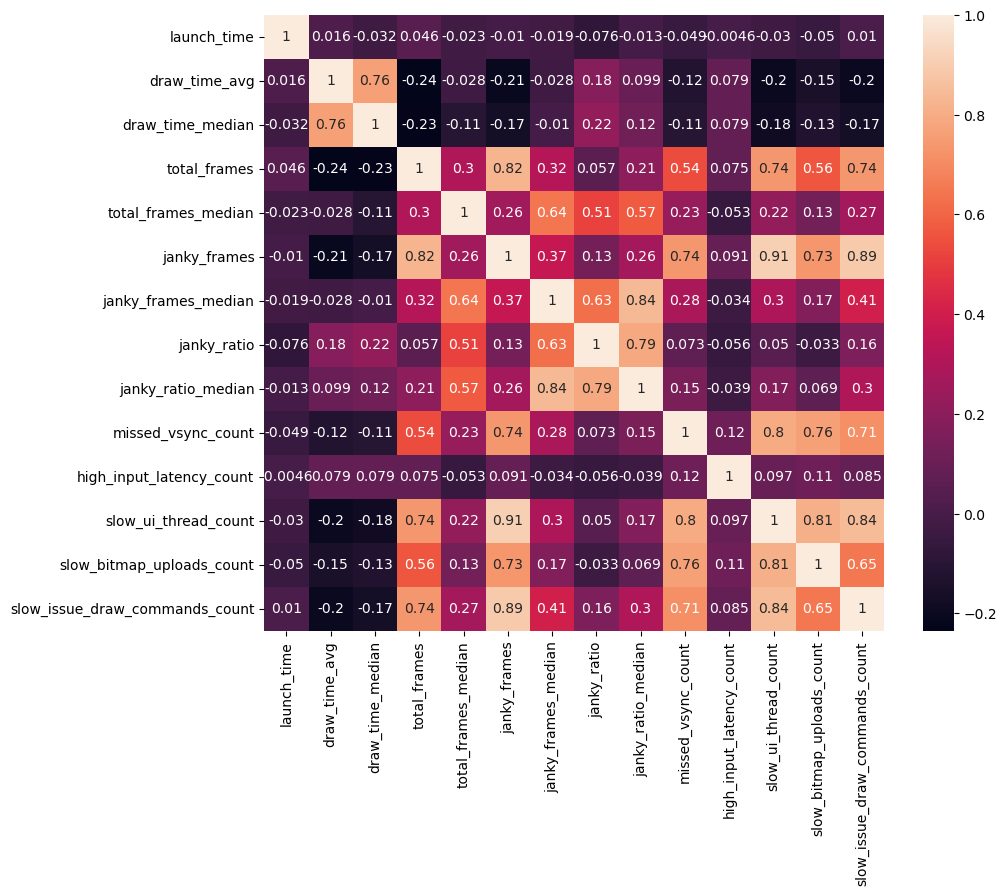

In [5]:
exploration.show_heatmap(data)

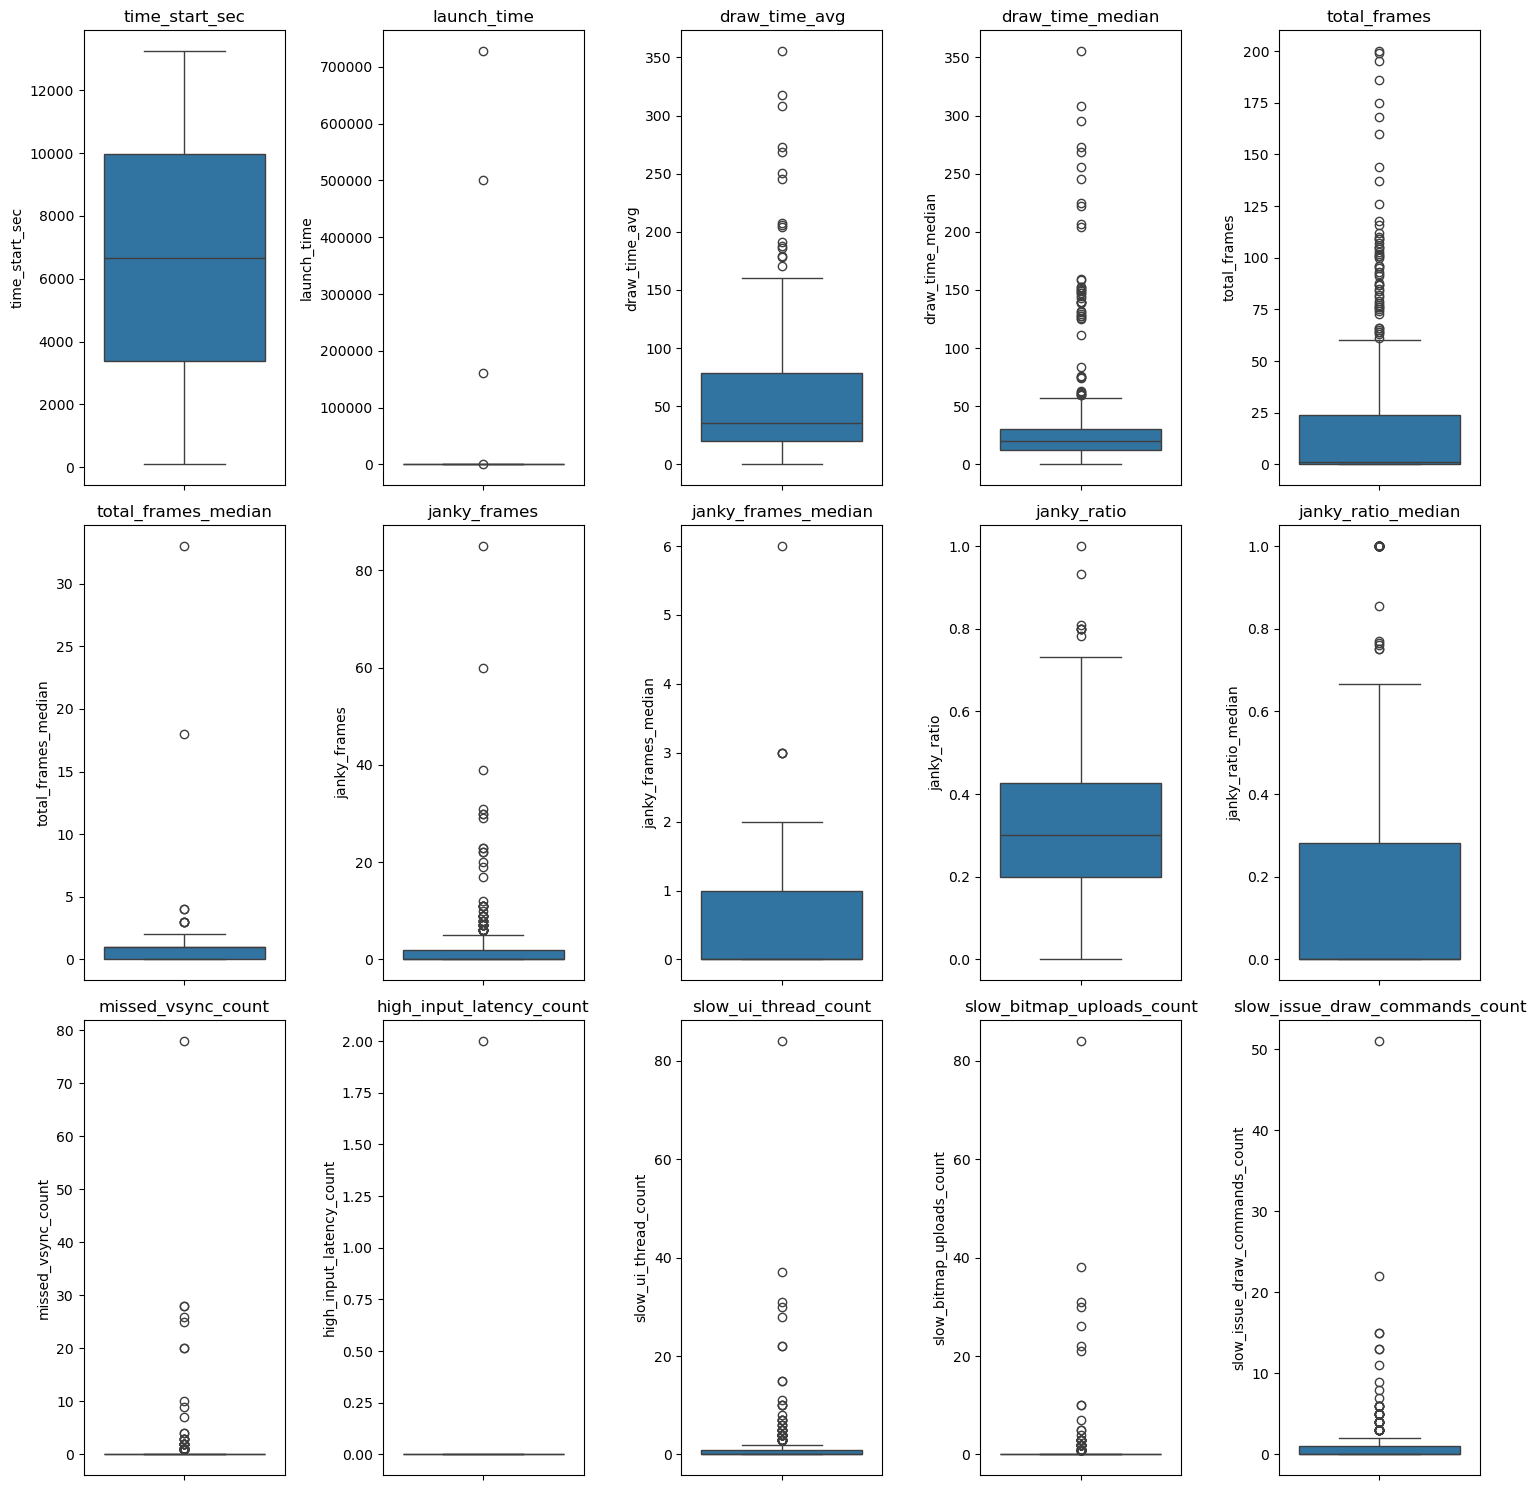

In [6]:
exploration.show_boxplots(data)

# Data Preparation

In [7]:
data = cleaning.get_z_score(data)


Z-score:

Outliers count: 39


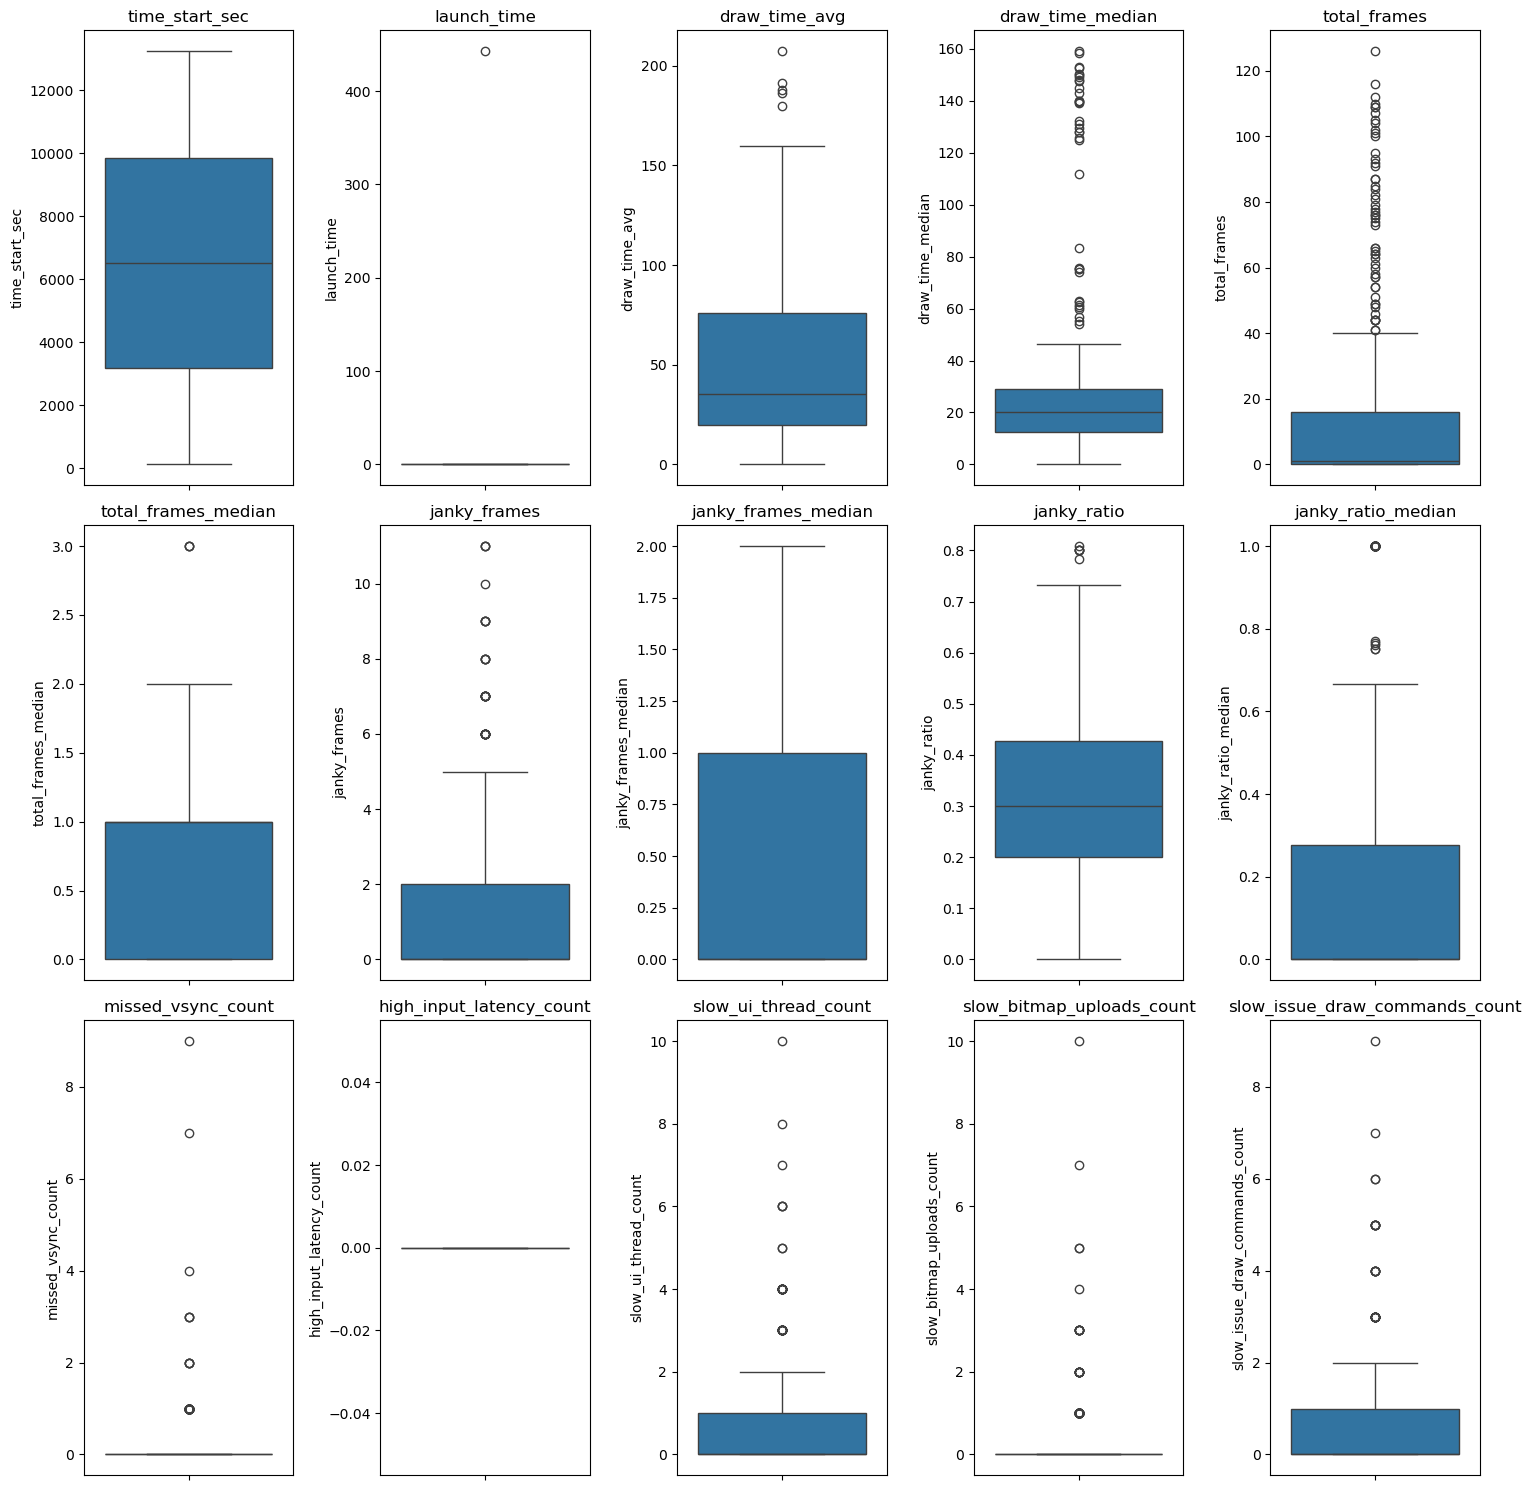

In [8]:
exploration.show_boxplots(data)

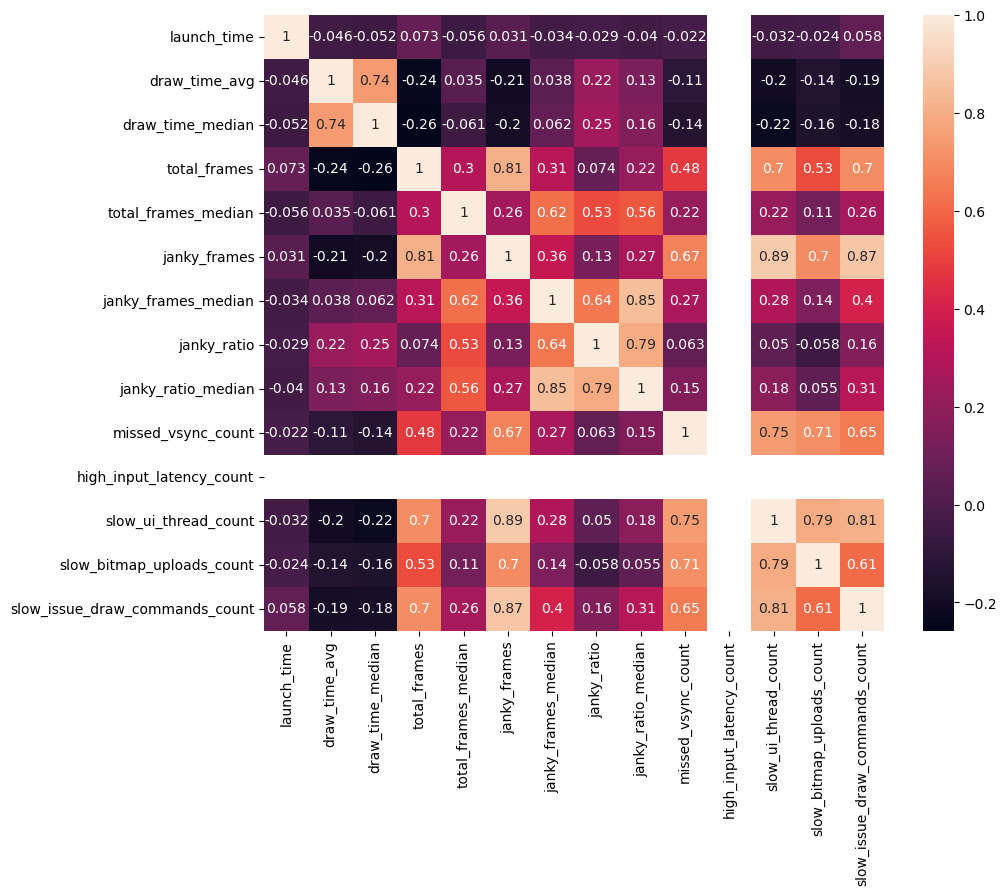

In [9]:
exploration.show_heatmap(data)